In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
import shap
from sklearn.metrics import ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier

In [39]:
shap.initjs()

In [2]:
df = pd.read_csv('NPAR6.csv')
df.head()

,subject_id,hadm_id,stay_id,intime,race,gender,age,mortality_icu,mortality_hosp,los,...,alcoholic,biliary,drug_induced,unspecified,mortality_7d,mortality_28d,mortality_90d,mortality_1y,has_kidney_disease,has_sepsis
0,19753686,29945708,30469520,2152-04-07T19:23:59,UNKNOWN,M,50,0,0,4.701343,...,0,1,1,1,0,0,0,0,0,0
1,10442603,23644640,31663173,2125-02-25T15:33:43,UNKNOWN,M,67,1,1,1.110764,...,1,0,0,1,1,1,1,1,0,1
2,15696172,21774504,36542183,2187-02-07T00:52:41,UNKNOWN,M,63,1,1,1.417917,...,0,0,0,1,1,1,1,1,0,1
3,19352969,21921993,34589708,2180-10-06T13:15:00,WHITE,F,67,1,1,1.496956,...,0,1,0,1,1,1,1,1,0,0
4,13734425,25179112,35877842,2132-09-06T09:00:00,WHITE,F,91,1,1,2.088681,...,0,1,0,1,1,1,1,1,0,0


In [4]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'race', 'gender', 'age',
       'mortality_icu', 'mortality_hosp', 'los', 'hosp_los', 'icu_los',
       'admittime', 'dod', 'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cere

In [5]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

In [16]:
cols = ['age',
       'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cerebrovascular_disease', 'chronic_pulmonary_disease', 'renal_disease',
       'malignant_cancer', 'diabetes_with_cc', 'diabetes_without_cc',
       'severe_liver_disease', 'sepsis', 'aki', 'octreotide', 'vasopressin',
       'betablocker', 'mv', 'crrt', 'ercp', 'pancreatic_drainage',
       'diabetes_mellitus', 'bisap_score', 'alcoholic', 'biliary',
       'drug_induced', 'unspecified', 'has_kidney_disease', 'has_sepsis']

In [18]:
imp = IterativeImputer(max_iter=1000, random_state=2026)
df[cols] = imp.fit_transform(df[cols])

In [19]:
cols_scale = ['age','inr_max', 'pt_max', 'ptt_max',
        'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
        'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
        'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
        'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
        'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
        'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
        'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
        'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
        'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
        'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean']

In [20]:
scaler = MaxAbsScaler()
df[cols_scale] = scaler.fit_transform(df[cols_scale])

In [21]:
X, y = df[cols], df['mortality_28d']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2026)

In [23]:
lg = LogisticRegression(max_iter=500)
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.8471337579617835

In [24]:
lg.coef_.shape, X.columns

((1, 78),
 Index(['age', 'inr_max', 'pt_max', 'ptt_max', 'abs_neutrophils_max',
        'abs_lymphocytes_max', 'abs_monocytes_max', 'glucose_max',
        'hematocrit_max', 'wbc_max', 'aniongap_max', 'creatinine_max',
        'sodium_max', 'potassium_max', 'bilirubin_total_max', 'neutrophis_max',
        'bun_min', 'albumin_min', 'platelets_min', 'bicarbonate_min',
        'calcium_min', 'hemoglobin_min', 'ast_max', 'alp_max', 'bun_max',
        'chloride_max', 'rdw_max', 'hdl', 'ldl', 'cholesterol', 'triglycerides',
        'alt_max', 'total_protein_max', 'amylase_max', 'lipase', 'NPAR', 'SII',
        'NLR', 'PLR', 'LMR', 'NPR', 'SIRI', 'sapsii', 'oasis', 'sofa', 'cci',
        'apsiii', 'heart_rate_mean', 'resp_rate_mean', 'mbp_mean',
        'temperature_mean', 'spo2_mean', 'myocardial_infarct',
        'congestive_heart_failure', 'cerebrovascular_disease',
        'chronic_pulmonary_disease', 'renal_disease', 'malignant_cancer',
        'diabetes_with_cc', 'diabetes_without_cc', '

In [26]:
df_coef = pd.DataFrame({
    'features': X.columns,
    'coef': lg.coef_.flatten()
})
df_coef['coef_abs'] = df_coef['coef'].abs()
df_coef.sort_values(by = 'coef_abs', ascending=False).head(10)

,features,coef,coef_abs
64,vasopressin,1.464229,1.464229
26,rdw_max,1.363637,1.363637
0,age,1.280527,1.280527
46,apsiii,1.261019,1.261019
14,bilirubin_total_max,1.237048,1.237048
17,albumin_min,-1.053179,1.053179
15,neutrophis_max,-1.024069,1.024069
9,wbc_max,0.872982,0.872982
42,sapsii,0.834563,0.834563
62,aki,-0.725837,0.725837


In [32]:
explainer = shap.Explainer(model=lg, masker=X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap_values.shape

(157, 78)

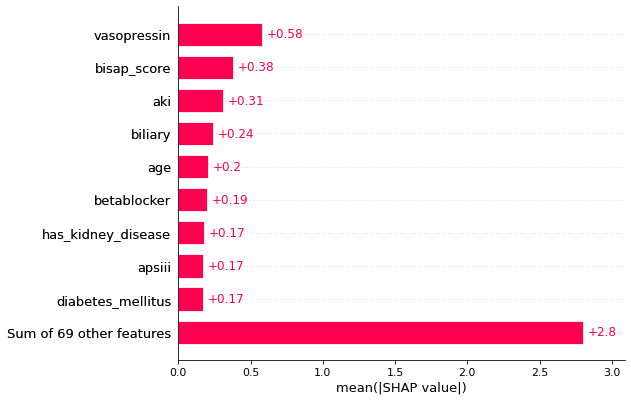

In [33]:
shap.plots.bar(shap_values)

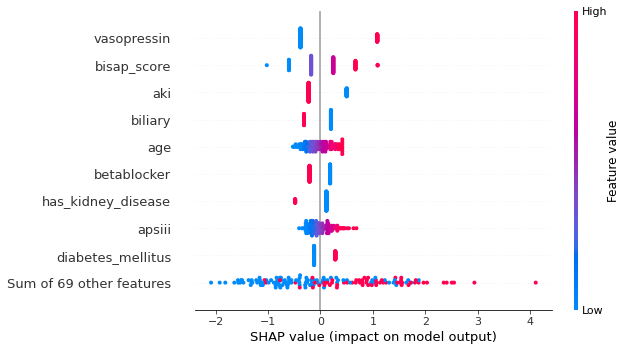

In [34]:
shap.plots.beeswarm(shap_values)

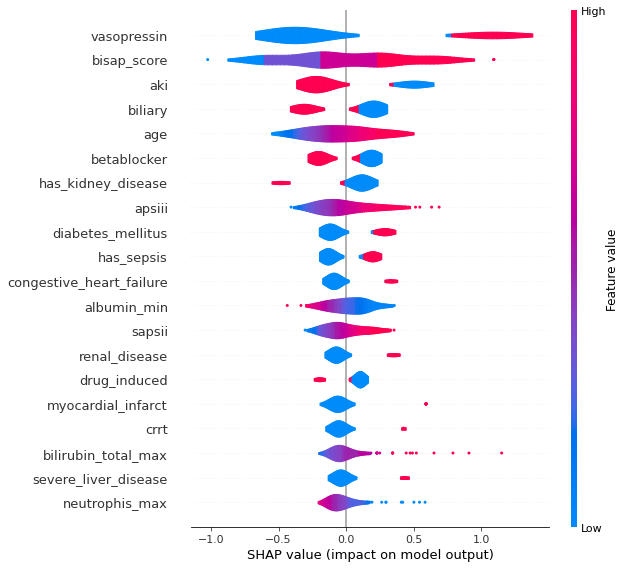

In [35]:
shap.plots.violin(shap_values)

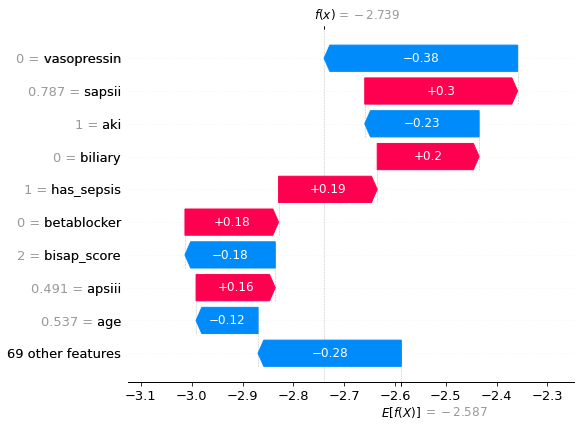

In [36]:
shap.plots.waterfall(shap_values[0])

In [40]:
ind = 0
shap.plots.force(shap_values[ind])

In [47]:
lgcv = RandomForestClassifier(random_state=2026)
lgcv.fit(X_train,y_train)
lgcv.score(X_test, y_test)

0.8662420382165605

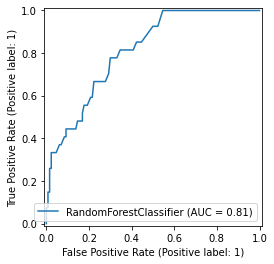

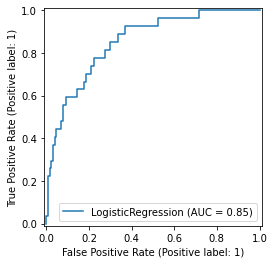

In [48]:
RocCurveDisplay.from_estimator(lgcv, X = X_test, y=y_test)
RocCurveDisplay.from_estimator(lg, X=X_test, y = y_test)

In [49]:
rfc = RandomForestClassifier(random_state=2026)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.8662420382165605

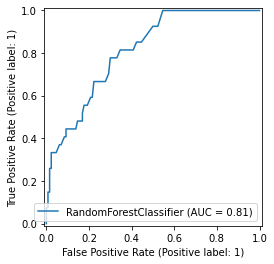

In [50]:
RocCurveDisplay.from_estimator(rfc, X=X_test, y = y_test)

In [52]:
explainer = shap.Explainer(model=lg, masker=X_train)
shap_values = explainer(X_test)
shap_values.shape

(157, 78)

In [53]:
explainer = shap.Explainer(model=rfc, masker=X_train)
shap_values = explainer(X_test)
shap_values.shape

(157, 78, 2)

<Axes: xlabel='importances', ylabel='features'>

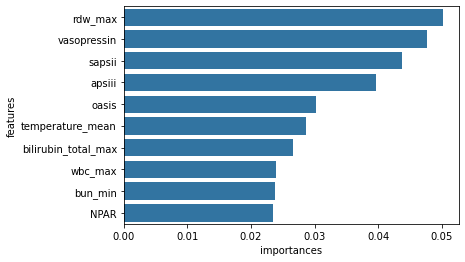

In [55]:
import seaborn as sns
df_imp = pd.DataFrame({
    'features': X_train.columns,
    'importances': rfc.feature_importances_
}).sort_values(by='importances', ascending=False).head(10)

sns.barplot(df_imp, y='features', x='importances')


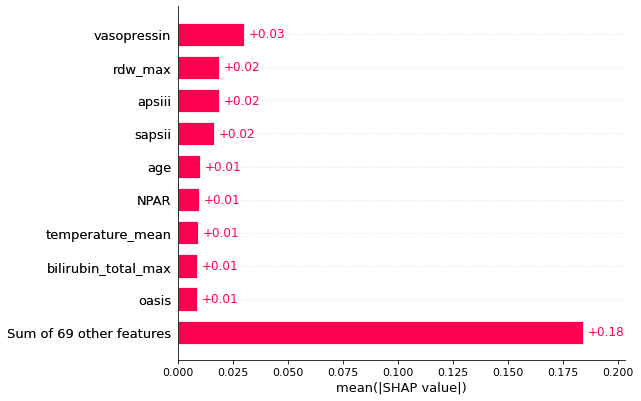

In [56]:
shap.plots.bar(shap_values[:, :, 1])

In [57]:
shap.plots.force(shap_values[0, :, 1])

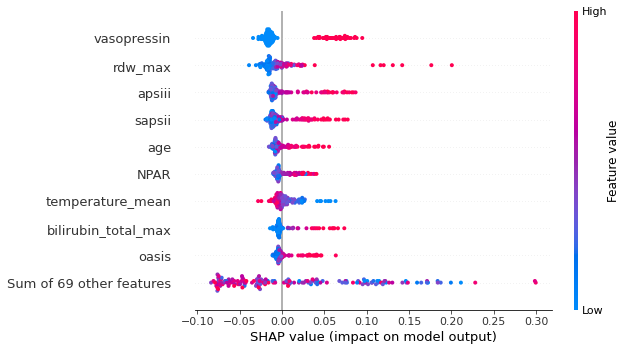

In [58]:
shap.plots.beeswarm(shap_values[..., 1])